## Deflection in a 1-dimensional bar using elimination method


In [77]:
#importing of libs
import matplotlib.pyplot as plt
import numpy as np

In [78]:
n_e = 5 #number of elements
E = np.zeros(n_e) #local young's modulus
A = np.zeros(n_e) #areas of each element
l = 1 #length of domain
l_e = l/n_e #length of each element assuming uniform elements

i = 0
while i < n_e: #initialize young's modulus array
    E[i] = E[i] + (200*(10**9))
    i += 1
i = 0

while i < n_e: #initialize area array
    A[i] = A[i] + (0.1*0.1)
    i += 1

print("areas =", A)
print("young's modulus =", E)


areas = [0.01 0.01 0.01 0.01 0.01]
young's modulus = [2.e+11 2.e+11 2.e+11 2.e+11 2.e+11]


In [90]:
#initialize forces and displacement vectors
q = np.zeros(n_e)

#initialize boundary conditions
i = 0
while i < n_e:
    if i != 0:
        if i != 4:
            q[i] = q[i] -10000000 #assign dummy displacement
    i += 1

F = np.zeros(n_e+1)
F[3] = 30*(10**3)


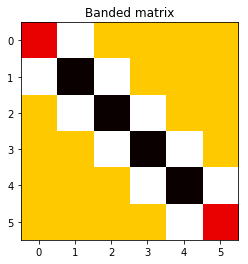

In [91]:
#evaluate local stiffness matrix
s = (n_e,2,2)
k = np.zeros(s)
i = 0
while i < n_e:
    k[i][0][0] = -A[i]*E[i]/l_e
    k[i][1][0] = A[i]*E[i]/l_e
    k[i][0][1] = A[i]*E[i]/l_e
    k[i][1][1] = -A[i]*E[i]/l_e
    i+= 1
s = (n_e+1,n_e+1)
#create global stiffness matrix
k_global = np.zeros(s)
ele = 0
while ele < n_e:
    k_e = k[ele]
    k_global[ele][ele] += k_e[0][0]
    k_global[ele+1][ele] += k_e[1][0]
    k_global[ele][ele+1] += k_e[0][1]
    k_global[ele+1][ele+1] += k_e[1][1]
    ele +=1
plt.title("Banded matrix")
plt.imshow(k_global, cmap = 'hot')

[0, 4]
[    0.     0. 30000.     0.]
[-1.2e-06 -2.4e-06 -3.6e-06 -1.8e-06]


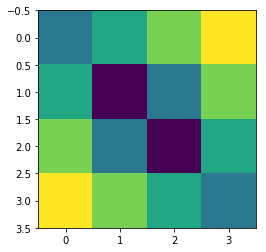

In [94]:
#elimination method
i = 0
c = 0
bd_rows = []
k_glob_fin = k_global
f_fin = F
while i < n_e:
    if q[i] == 0:
        bd_rows.append(i)
        f_fin = np.delete(f_fin, i , 0)
        k_glob_fin = np.delete(k_glob_fin, i, 0)
        k_glob_fin = np.delete(k_glob_fin, i, 1)
    i += 1
print(bd_rows)
k_inv = np.linalg.inv(k_glob_fin)
print(f_fin)
plt.imshow(k_inv)
q_new = np.dot(k_inv,f_fin)
print(q_new)

        
        